# Merge/Join Tables (VLOOKUP)

The _merge_ function mimics the functionality of JOIN in SQL queries and replaces the VLOOKUP functionality in Excel. It is one of the most powerful and useful functions for dataframes in Pandas. The main idea is to:
- **join** two (or more) dataframe table using similar keys in each of the tables. 
- **enrich** tables with loopup data  
- **validate** the match values of the key columns in the tables

In [4]:
import pandas as pd

## Loading lookup data

For this example, we will take one of the common lookup data, zip code. The loopup is not trivial as there are a few tousands (more than 33,000 as you can see below) of values and a simple Excel file will struggle to do it efficently and quickly. 

We will start with loading the loopup data from [Simple Maps](https://simplemaps.com/data/us-zips), which I've downloaded to a public S3 bucket.

In [1]:
url = 'https://mlguy-public.s3-eu-west-1.amazonaws.com/excel2pandas/chapter3/simplemaps_uszips_basicv1/uszips.csv'

import requests
from io import StringIO

response = requests.get(url)
response

<Response [200]>

The CSV file is read through a URL and therefore, we need to convert the text of the response to a simple string as we get when we read a local file. For that we will use the StringIO functionality as follows:

In [91]:
zip_lookup = (
    pd
    .read_csv(
        StringIO(
            response.text
        )
    )
)

zip_lookup

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,AÃ±asco,"{'72003':0.55,'72011':99.45}",AÃ±asco|Aguada,72011|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33092,99923,55.97796,-130.03671,Hyder,AK,Alaska,True,NaN,15,2.1,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33093,99925,55.55767,-132.97627,Klawock,AK,Alaska,True,NaN,927,5.7,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33094,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1635,4.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33095,99927,56.25100,-133.37571,Point Baker,AK,Alaska,True,NaN,38,0.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka


## Lookup Data Exploration

The table above shows us the type of data that we can get from enrichment based on the zip code, including city, state, latitude, longitude, population count and density.  

We can explore the values that we have in this table, before we start to use it for enrichment.

## Counting Values

The simplest aggregation function for each group is the _size_. How many zip codes do we have in each state?

In [32]:
(
    zip_lookup
    .groupby('state_name')
    .size()
)

state_name
Alabama                  642
Alaska                   238
Arizona                  405
Arkansas                 591
California              1761
Colorado                 525
Connecticut              282
Delaware                  67
District of Columbia      52
Florida                  981
Georgia                  735
Hawaii                    94
Idaho                    277
Illinois                1383
Indiana                  775
Iowa                     934
Kansas                   697
Kentucky                 767
Louisiana                515
Maine                    432
Maryland                 468
Massachusetts            537
Michigan                 986
Minnesota                884
Mississippi              423
Missouri                1022
Montana                  361
Nebraska                 581
Nevada                   175
New Hampshire            248
New Jersey               595
New Mexico               368
New York                1794
North Carolina           808
Nor

## Sorting Values

To sort the values is also simple with _sort_value()_ function, and see the population size of each state (based on the zip code lookup data):
* Start with the zip lookup data above
* Group the row by _state\_name_ and take only the _population_ values
* Sum up all the population values for each zip code area in the state Group
* Sort the states by the accumulated population value in descending order

In [33]:
us_population_distribution = (
    zip_lookup
    .groupby('state_name')['population']
    .sum()
    .sort_values(ascending=False)
)

us_population_distribution

state_name
California              39140219
Texas                   27884135
Florida                 20594164
New York                19618323
Illinois                12821487
Pennsylvania            12790950
Ohio                    11639989
Georgia                 10297534
North Carolina          10155624
Michigan                 9957465
New Jersey               8881845
Virginia                 8414042
Washington               7280023
Arizona                  6949259
Massachusetts            6830133
Tennessee                6644470
Indiana                  6637220
Missouri                 6090358
Maryland                 6003435
Wisconsin                5777892
Colorado                 5531233
Minnesota                5527473
South Carolina           4955925
Alabama                  4864630
Louisiana                4663243
Kentucky                 4446667
Oregon                   4081732
Oklahoma                 3918473
Connecticut              3581504
Puerto Rico              3384779

## Visualization of the data


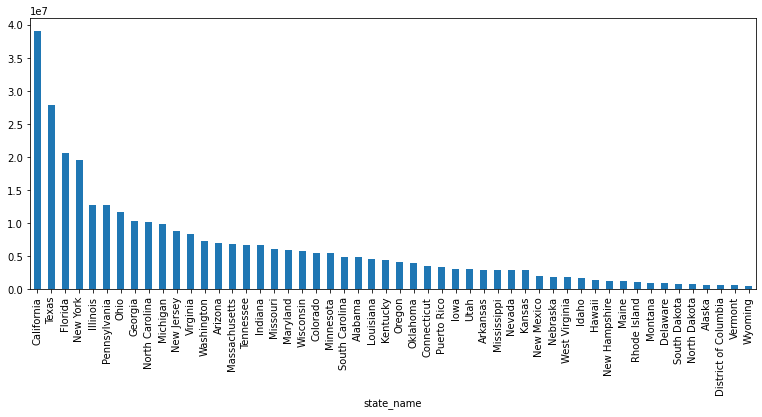

In [34]:
(
    us_population_distribution
    .plot
    .bar(figsize=(13,5))
);

## Loading the main data

We will take the data about brewries in the US that we used in one of the previous lessson, and enrich it with the data from the zip codes table. We will load it from the local file after we retried the data from the API before. 

In [106]:
breweries_data= pd.read_csv('../data/us_breweries.csv')

In [107]:
breweries_data.head()

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,2,Avondale Brewing Co,micro,201 41st St S,NaN,NaN,Birmingham,Alabama,NaN,35222-1932,United States,-86.774322,33.524521,2.057775e+09,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z
1,44,Trim Tab Brewing,micro,2721 5th Ave S,NaN,NaN,Birmingham,Alabama,NaN,35233-3401,United States,-86.791400,33.512849,2.057031e+09,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,NaN,NaN,Huntsville,Alabama,NaN,35805-3046,United States,-86.593201,34.727752,2.569756e+09,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,NaN,NaN,Wasilla,Alaska,NaN,99654-7679,United States,-149.412710,61.575269,NaN,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z
4,76,King Street Brewing Co,micro,9050 King Street,NaN,NaN,Anchorage,Alaska,NaN,99515,United States,-149.879076,61.138489,9.073365e+09,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z


We can see that the postal code is sometimes in the longer format (for example, _35222-1932_) compare to the zip codes that we have in our lookup table (for example, 35222). We will convert them to the shorter format by taking the first 5 characters ([:5]) of the string of the postal_code column.

In [108]:
breweries_data_with_zip = (
    breweries_data
    .assign(zip_code = lambda x : x.postal_code.str[:5])
)

In [109]:
breweries_data_with_zip.head()

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at,zip_code
0,2,Avondale Brewing Co,micro,201 41st St S,NaN,NaN,Birmingham,Alabama,NaN,35222-1932,United States,-86.774322,33.524521,2.057775e+09,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z,35222
1,44,Trim Tab Brewing,micro,2721 5th Ave S,NaN,NaN,Birmingham,Alabama,NaN,35233-3401,United States,-86.791400,33.512849,2.057031e+09,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z,35233
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,NaN,NaN,Huntsville,Alabama,NaN,35805-3046,United States,-86.593201,34.727752,2.569756e+09,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z,35805
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,NaN,NaN,Wasilla,Alaska,NaN,99654-7679,United States,-149.412710,61.575269,NaN,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z,99654
4,76,King Street Brewing Co,micro,9050 King Street,NaN,NaN,Anchorage,Alaska,NaN,99515,United States,-149.879076,61.138489,9.073365e+09,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z,99515


## Joining the tables

The joining of the table is based on a joined key. In this case we want to use the 5-digits zip code as the lookup or join key. In the previous step with shorten the longer zip codes to the shorter 5 digits format, and now we will make sure that the lookup table also have it in the same format. 
* Start with the zip loopup table
* Add a column zip_code that is based on the value of the column _zip_
* Convert the numeric value into string (_astype(str)_), 
* Pad the string with zeros when the number is shorter than 5 digits (_zfill(5)_).

In [124]:
zip_lookup_as_string = (
    zip_lookup
    .assign(
        zip_code = lambda x : x.zip
        .astype(str)
        .str
        .zfill(5)
    )
)

The join itself is simple. 
* Start with the breweries table that you want to enrich 
* Join using _merge_ with the second zip loopup table 
* Define the key column with the same name (zip_code), and we use it using the _on_ argument
* Lastly, we want to have all breweries, even if we don't find the zip code in the lookup table. Therefore, we are using _LEFT_ join using the _how_ argument. 

In [111]:
enriched_breweries_data = (
    breweries_data_with_zip
    .merge(
        zip_lookup_as_string, 
        on='zip_code', 
        how='left'
    )
)

We have now many more columns as all the columns of both tables are joined to the enriched table. We will ask the Jupyter notebook to show us all the columns by removing the default maximum number of columns to display. 

In the table below we can see all the columns. If the same column name is found in both tables and it wasn't the column that was used for the join or merge, the column of first ("left") table will be appended with x (city_x, for example), and the column of the second ("right") table will be appended with y (city_y, for example).

In [112]:
pd.set_option('display.max_columns', None)
enriched_breweries_data

,id,name,brewery_type,street,address_2,address_3,city_x,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at,zip_code,zip,lat,lng,city_y,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,2,Avondale Brewing Co,micro,201 41st St S,NaN,NaN,Birmingham,Alabama,NaN,35222-1932,United States,-86.774322,33.524521,2.057775e+09,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z,35222,35222.0,33.52409,-86.77025,Birmingham,AL,Alabama,True,NaN,9033.0,815.8,1073.0,Jefferson,{'01073':100},Jefferson,01073,False,False,America/Chicago
1,44,Trim Tab Brewing,micro,2721 5th Ave S,NaN,NaN,Birmingham,Alabama,NaN,35233-3401,United States,-86.791400,33.512849,2.057031e+09,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z,35233,35233.0,33.50876,-86.80194,Birmingham,AL,Alabama,True,NaN,1715.0,300.7,1073.0,Jefferson,{'01073':100},Jefferson,01073,False,False,America/Chicago
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,NaN,NaN,Huntsville,Alabama,NaN,35805-3046,United States,-86.593201,34.727752,2.569756e+09,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z,35805,35805.0,34.70858,-86.62125,Huntsville,AL,Alabama,True,NaN,21200.0,949.7,1089.0,Madison,{'01089':100},Madison,01089,False,False,America/Chicago
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,NaN,NaN,Wasilla,Alaska,NaN,99654-7679,United States,-149.412710,61.575269,NaN,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z,99654,99654.0,61.45483,-149.90045,Wasilla,AK,Alaska,True,NaN,62135.0,40.4,2170.0,Matanuska-Susitna,{'02170':100},Matanuska-Susitna,02170,False,False,America/Anchorage
4,76,King Street Brewing Co,micro,9050 King Street,NaN,NaN,Anchorage,Alaska,NaN,99515,United States,-149.879076,61.138489,9.073365e+09,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z,99515,99515.0,61.11739,-149.88889,Anchorage,AK,Alaska,True,NaN,23402.0,818.8,2020.0,Anchorage,{'02020':100},Anchorage,02020,False,False,America/Anchorage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,345,Barrel Brothers Brewing Company,micro,399 Business Park Ct Ste 506,NaN,NaN,Windsor,California,NaN,95492-6652,United States,NaN,NaN,7.076969e+09,http://www.barrelbrothersbrewing.com,2018-08-11T21:35:55.480Z,2018-07-24T01:32:52.148Z,95492,95492.0,38.53034,-122.81716,Windsor,CA,California,True,NaN,29920.0,579.0,6097.0,Sonoma,{'06097':100},Sonoma,06097,False,False,America/Los_Angeles
7446,352,Bay Bridge Brewing Co,micro,688 Marsat Ct Ste B,NaN,NaN,Chula Vista,California,NaN,91911-4697,United States,NaN,NaN,6.199347e+09,http://www.baybridgebrewing.com,2018-08-11T21:35:55.704Z,2018-07-24T01:32:52.238Z,91911,91911.0,32.60738,-117.05405,Chula Vista,CA,California,True,NaN,85365.0,2736.2,6073.0,San Diego,{'06073':100},San Diego,06073,False,False,America/Los_Angeles
7447,367,Benchmark Brewing Co,micro,6190 Fairmount Ave Ste G,NaN,NaN,San Diego,California,NaN,92120-3428,United States,NaN,NaN,6.197953e+09,http://www.benchmarkbrewing.com,2018-08-11T21:35:56.157Z,2018-07-24T01:32:52.420Z,92120,92120.0,32.79468,-117.07114,San Diego,CA,California,True,NaN,29142.0,1501.7,6073.0,San Diego,{'06073':100},San Diego,06073,False,False,America/Los_Angeles
7448,477,Chino Valley Brewery,micro,"1609 E. Grove Ave, Unit 109",NaN,NaN,Ontario,California,NaN,91761-5786,United States,NaN,NaN,9.512917e+09,http://www.chinovalleybrewery.com,2018-08-11T21:35:59.331Z,2018-07-24T01:32:53.774Z,91761,91761.0,34.03459,-117.59212,Ontario,CA,California,True,NaN,61124.0,754.0,6071.0,San Bernardino,{'06071':100},San Bernardino,06071,False,False,America/Los_Angeles


Now, that we have the enriched table, we can analyze the joined data and explore the different counties across the US:
* Start with the enriched breweries data above
* Group the breweries by county_name
* For each group add the State ID 
* count the number of breweries, 
* sum up the populations of each zip code area in each group
* and calculate the average population density in the county 
* Sort that list by the population size

In [113]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .sort_values(by='population_sum', ascending=False)
)

,state,brewry_count,population_sum,density_average
county_name,,,,
San Diego,CA,154,6059002.0,1670.298052
Los Angeles,CA,126,4529555.0,2834.088095
Cook,IL,98,4510406.0,5011.613265
King,WA,117,3519428.0,2407.258120
Orange,CA,88,3261503.0,1574.422727
...,...,...,...,...
Clearwater,ID,1,164.0,5.800000
Koochiching,MN,1,151.0,334.400000
Harding,NM,1,139.0,0.100000


We can see that _san Diego_ is the largest county in terms of population and also a beer county with 154 different brewries in it. 

Let's change the sort key to find the counties with the most breweries

In [114]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .sort_values(by='brewry_count', ascending=False)
)

,state,brewry_count,population_sum,density_average
county_name,,,,
San Diego,CA,154,6059002.0,1670.298052
Los Angeles,CA,126,4529555.0,2834.088095
King,WA,117,3519428.0,2407.258120
Cook,IL,98,4510406.0,5011.613265
Jefferson,AL,93,1951501.0,770.348387
...,...,...,...,...
Flagler,FL,1,43813.0,247.300000
Fond du Lac,WI,1,10579.0,37.900000
Pitkin,CO,1,10653.0,8.900000


If you remember the map of the US that we saw in the previous section, it is now more clear the Cook county in IL is likely the dark area we saw in our hexbin visualization of the data, as a dense population of breweries. 

We can now ask ourselves where do we have the most brewries per population and add this column to our table

In [115]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .assign(brewry_per_population = lambda x : x.brewry_count / x.population_sum * 1000)
    .sort_values(by='brewry_per_population', ascending=False)
)

,state,brewry_count,population_sum,density_average,brewry_per_population
county_name,,,,,
Keweenaw,MI,1,87.0,1.000000,11.494253
Wabasha,MN,1,88.0,29.500000,11.363636
Harding,NM,1,139.0,0.100000,7.194245
Koochiching,MN,1,151.0,334.400000,6.622517
Clearwater,ID,1,164.0,5.800000,6.097561
...,...,...,...,...,...
Cabarrus,NC,5,299927.0,256.800000,0.016671
Fort Bend,TX,6,371516.0,472.583333,0.016150
Chesapeake,VA,1,65603.0,155.100000,0.015243


We can see, as it is often the case, that we have on the top and the bottom of the table counties with very few brewries. The top of the table of brewries per 1000 people is held by Keweenaw that was last on our previous table of counties by population. To avoid this, we can filter (using _query_) our table to counties that have more than 5 brewries.

In [123]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .assign(brewry_per_population = lambda x : x.brewry_count / x.population_sum * 1000)
    .query("brewry_count > 5")
    .sort_values(by='brewry_per_population', ascending=False)
)

,state,brewry_count,population_sum,density_average,brewry_per_population
county_name,,,,,
Schuyler,NY,7,15117.0,26.285714,0.463055
Grafton,NH,7,25969.0,28.714286,0.269552
Windsor,VT,7,28073.0,36.228571,0.249350
Waldo,ME,7,28697.0,28.357143,0.243928
Grand,CO,7,30992.0,3.485714,0.225865
...,...,...,...,...,...
St. Charles,MO,7,356115.0,426.171429,0.019657
Kings,CA,30,1706298.0,14137.416667,0.017582
Gwinnett,GA,6,349573.0,737.716667,0.017164


And the winner is Schuyler county in New York, with 7 brewries and a 0.46 brewry for every 1,000 people

## Geographic Mapping

The merge that we did allows us now to have geo location information for all the breweries, including the ones that didn't have it in the original data set, as we have the geo location of the zip code area.  

We can also add layers on real maps using the library GeoPandas. Let's start with installing the library to our environment. 

In [127]:
pip install geopandas

     |████████████████████████████████| 962 kB 1.2 MB/s 
     |████████████████████████████████| 7.4 MB 7.4 MB/s 
     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 14.8 MB 5.2 MB/s 
Note: you may need to restart the kernel to use updated packages.


We also need to install a library to handle geo coordinates

In [132]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


We will import the library

In [159]:
import geopandas

* Create a data frame that is designed for geo data
* Start with the enriched breweries data above
* Define the geometry of the data from 
* x as the longitude (_lng_ column)
* y as the latitude (_lat_ column)

In [160]:
gdf = (
    geopandas
    .GeoDataFrame(
    enriched_breweries_data, 
    geometry=geopandas
    .points_from_xy(
        enriched_breweries_data.lng, 
        enriched_breweries_data.lat)
    )
)

Create a geo dataframe for the world map from the built-in dataset of GeoPandas library

In [161]:
world = (
    geopandas
    .read_file(
        geopandas
        .datasets
        .get_path('naturalearth_lowres')
    )
)

* Start with the world data frame
* Filter it to use only the USA parts
* Focus on the geometry boundaries of the map
* Plot the map
* using black color
* and thin lines (0.2)
* Now, plot the breweries data 
* on the above map 
* using red dots 
* and one pixel for each

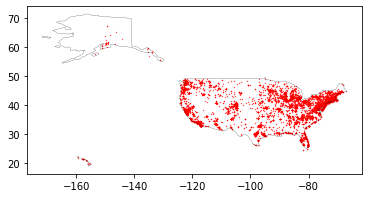

In [166]:
# We restrict to USA
ax = (
    world
    [world.iso_a3 == 'USA']
    ['geometry']
    .boundary
    .plot(
        color='black', 
        edgecolor='black', 
        linewidth=0.2
    )
)

( 
    gdf
    .plot(
        ax=ax, 
        color='red',
        markersize = 1
    )
);

This is a good start, but we can't really use it. Let's make it more usable to know where is the beer hub in the US.

* Create a 2D histogram based on the enriched breweries data 
* using x as latitude (_lat_ column),
* y as longtitude (_lng_ column),
* and 1000 bins for the histogram
* Focus only on the main land using its coordinates
* Then, create a smooth heat map from the histogram 

In [212]:
import numpy as np
from scipy import ndimage

heatmap, xedges, yedges = np.histogram2d(
    enriched_breweries_data['lat'], 
    enriched_breweries_data['lng'],
    bins=1000, 
    range=[
        [25, 50],  # North-South extent of US
        [-125, -65]  # East-West extent of US, 
    ]
)
extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
logheatmap = np.log(heatmap)
logheatmap[np.isneginf(logheatmap)] = 0
logheatmap = ndimage.filters.gaussian_filter(logheatmap, 30, mode='nearest')  # smooth out peaks


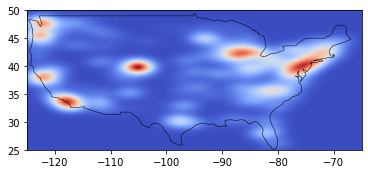

In [215]:
ax = (
    world
    [world.iso_a3 == 'USA']
    ['geometry']
    .boundary
    .plot(
        color='k', 
        edgecolor='black', 
        linewidth=0.5
    )
)

ax.imshow(logheatmap, cmap='coolwarm', extent=extent)
ax.invert_yaxis()
ax.set(xlim=[-125, -65], ylim=[25, 50]);

We can clearly see the hubs in San Diego, New York, Illinois, and another one in Colorado.